In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Information_retrieval_project/khan_acad/train_khan_acad.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/khan_acad/test_khan_acad.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/khan_acad/val_khan_acad.csv" /content


In [ ]:
# !cp -r "/content/drive/My Drive/Information_retrieval_project/IR_project_model_hyperbolic_hinge_5_2/" /content/

In [ ]:
!pip install transformers==3.2.0

In [ ]:
!pip install git+https://github.com/geoopt/geoopt.git
! pip install git+https://github.com/ferrine/hyrnn.git

  Cloning https://github.com/geoopt/geoopt.git to /tmp/pip-req-build-01z1jl_j
  Running command git clone -q https://github.com/geoopt/geoopt.git /tmp/pip-req-build-01z1jl_j
  Created wheel for geoopt: filename=geoopt-0.3.1-cp36-none-any.whl size=76165 sha256=be62a6f2256697d15033ccdb14e1d31cf55219a7eecccae2c4b630a8afd91765
  Stored in directory: /tmp/pip-ephem-wheel-cache-53z9jois/wheels/10/df/30/e0d857f034c142ca5f38af048b62aae3da773b272553e5dd21
Successfully built geoopt
  Cloning https://github.com/ferrine/hyrnn.git to /tmp/pip-req-build-o0yke76t
  Running command git clone -q https://github.com/ferrine/hyrnn.git /tmp/pip-req-build-o0yke76t
  Created wheel for hyrnn: filename=hyrnn-0.0.0-cp36-none-any.whl size=13955 sha256=6cfd01546644d7f7182840fc71b254f21fcb07f4fb39ecaa1a1a97088cd92fb7
  Stored in directory: /tmp/pip-ephem-wheel-cache-jrhcamhr/wheels/24/c3/64/cc0e9d25d466081dc154a2a8843157f54d845b916b4ba66418
Successfully built hyrnn


In [ ]:
import pandas as pd
train_data = pd.read_csv("train_khan_acad.csv")
val_data = pd.read_csv("val_khan_acad.csv")
test_data = pd.read_csv("test_khan_acad.csv")

train_data


,video_transcripts,hierarchy
0,In the last couple of videos we saw that we c...,math>>multivariable-calculus>>multivariable-de...
1,- What we're going to do in this video is gi...,science>>ap-biology>>natural-selection
2,"So once again, we have three equal, or we say...",math>>pre-algebra>>pre-algebra-equations-expre...
3,- Liz's math test included a survey question...,math>>engageny-alg-1>>alg1-2
4,- The following two equations form a linear s...,math>>algebra-home>>alg-system-of-equations
...,...,...
4183,- Hello everyone. So this is what I might ca...,math>>multivariable-calculus>>multivariable-de...
4184,- Let's try now to subtract some two-digit n...,math>>early-math>>cc-early-math-add-sub-100
4185,- Let's say that I have a circle. My best att...,math>>engageny-geo>>geo-5
4186,- So let's look at the female reproductive cy...,science>>health-and-medicine>>human-anatomy-an...


In [ ]:
set(train_data["video_transcripts"].values).intersection(set(test_data["video_transcripts"].values))

set()

In [ ]:
from google.colab import files

In [ ]:
import re
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [ ]:
# final_data_1 = final_data.loc[0:71003,:]
# final_data_1

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Loading BERT tokenizer...


In [ ]:
train_data["video_transcripts"].value_counts()

 [This video contains no audio narrations.]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:

# from sklearn.preprocessing import LabelEncoder

# LE = LabelEncoder()
# final_data['label'] = LE.fit_transform(final_data['board_syllabus'])
# final_data.head()

In [ ]:
# def get_labels(prediction):
#     predicted_label =  LE.inverse_transform([prediction])
#     return predicted_label[0]

In [ ]:
# get_labels(330)

In [ ]:




# train_data = pd.concat([train_data,val_data])
# train_data

In [ ]:
train_features = train_data["video_transcripts"]
test_features = test_data["video_transcripts"]
train_labels = train_data["hierarchy"]
test_labels = test_data["hierarchy"]
val_features = val_data["video_transcripts"]
val_labels = val_data["hierarchy"]

In [ ]:
train_labels.value_counts()

science>>health-and-medicine>>circulatory-system-diseases           99
science>>health-and-medicine>>human-anatomy-and-physiology          65
science>>health-and-medicine>>respiratory-system-diseases           55
science>>health-and-medicine>>circulatory-system                    54
science>>health-and-medicine>>infectious-diseases                   52
                                                                    ..
math>>ap-statistics>>quantitative-data-ap                            1
math>>5th-engage-ny>>engage-5th-module-1                             1
science>>chemistry>>states-of-matter-and-intermolecular-forces       1
math>>in-in-class-7-math-india-icse>>in-in-7-pair-of-angles-icse     1
math>>precalculus>>x9e81a4f98389efdf:vectors                         1
Name: hierarchy, Length: 569, dtype: int64

In [ ]:
test_labels.value_counts()

science>>health-and-medicine>>human-anatomy-and-physiology          24
science>>health-and-medicine>>circulatory-system-diseases           22
science>>health-and-medicine>>circulatory-system                    17
science>>electrical-engineering>>robots                             11
science>>biology>>crash-course-bio-ecology                          11
                                                                    ..
math>>calculus-all-old>>derivative-applications-calc                 1
math>>ap-calculus-bc>>bc-advanced-functions-new                      1
math>>differential-equations>>first-order-differential-equations     1
math>>algebra2>>x2ec2f6f830c9fb89:poly-factor                        1
math>>algebra-home>>alg-radical-eq-func                              1
Name: hierarchy, Length: 416, dtype: int64

In [ ]:
question_answer = train_features.values
categories = train_labels.values

In [ ]:
question_answer

array([" In the last couple of videos we saw that we can describe a curves by a position vector-valued function. And in very general terms, it would be the x position as a function of time times the unit vector in the horizontal direction. Plus the y position as a function of time times the unit victor in the vertical direction. And this will essentially describe this-- though, if you can imagine a particle and let's say the parameter t represents time. It'll describe where the particle is at any given time. And if we wanted a particular curve we can say, well, this only applies for some curve-- we're dealing, it's r of t. And it's only applicable between t being greater than a and less than b. And you know, that would describe some curve in two dimensions. Just me just draw it here. This is all a review of really, the last two videos. So this curve, it might look something like that where this is where t is equal to a. That's where t is equal to b. And so r of a will be this vector ri

In [ ]:
categories

array(['math>>multivariable-calculus>>multivariable-derivatives',
       'science>>ap-biology>>natural-selection',
       'math>>pre-algebra>>pre-algebra-equations-expressions', ...,
       'math>>engageny-geo>>geo-5',
       'science>>health-and-medicine>>human-anatomy-and-physiology',
       'math>>multivariable-calculus>>greens-theorem-and-stokes-theorem'],
      dtype=object)

In [ ]:
# val_features = test_features.values
# val_labels = test_labels.values

In [ ]:
# this method can be used to project from euclidean space to hyperbolic space
def exponential_map(vector):
        norm_v = np.linalg.norm(vector, axis=1)
        coef = np.tanh(norm_v) / norm_v
        second_term = vector * coef[:, None]
        return second_term

In [ ]:
# this method can be used to project from euclidean space to hyperbolic space
def tensor_exponential_map(vector):
      vector_norm = vector.norm(dim=-1, p=2, keepdim=True).clamp_min(1e-15)
      gamma_1 = torch.nn.functional.tanh(vector_norm) * (vector / vector_norm)
      return gamma_1

In [ ]:

import numpy as np

from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors

from gzip import open as gopen

import gensim.models.poincare as poincare
poincare_model = poincare.PoincareModel.load("taxonomy_khan_acad_embedding_20.pkl")
def get_poincare_embeddings_data(taxonomy):
  cleaned_taxonomy = []
  for value in taxonomy:
      value = value.split(">>")
      cleaned_taxonomy.append( list(tok.lower() for tok in value) )
  return cleaned_taxonomy

In [ ]:

# course_taxonomy

poincare_emb_data = get_poincare_embeddings_data(categories)
poincare_val = get_poincare_embeddings_data(val_labels)

In [ ]:
# poincare_embedding =  [[ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] for taxonomy in poincare_emb_data ]
# np.linalg.norm(poincare_embedding[1000])

In [ ]:
# for index,embedding in enumerate(poincare_embedding):
#   poincare_embedding[index] = np.stack(embedding,axis=0)


In [ ]:
# np.array(poincare_embedding).shape

In [ ]:
poincare_embedding =  [exponential_map(np.expand_dims( np.hstack(  [ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] ),axis=0)) for taxonomy in poincare_emb_data ]
np.linalg.norm(poincare_embedding[1000])

0.899765215781272

In [ ]:
poincare_embedding_val = [exponential_map(np.expand_dims( np.hstack(  [ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] ),axis=0)) for taxonomy in poincare_val ]
np.linalg.norm(poincare_embedding_val[100])

0.8857759138716806

In [ ]:
poincare_val[100]

['math', 'cc-seventh-grade-math', 'cc-7th-ratio-proportion']

In [ ]:
poincare_embedding_val[100].shape

(1, 60)

In [ ]:
poincare_embedding[0].shape

(1, 60)

In [ ]:
max_val_train = 0
max_emb =None
for embedding in poincare_embedding:
  val = embedding.shape[1]
  if val >max_val_train:
    max_val_train=val
    max_emb =embedding
max_val_train


60

In [ ]:
max_val_val = 0
max_emb =None
for embedding in poincare_embedding_val:
  val = embedding.shape[1]
  if val >max_val_val:
    max_val_val=val
    max_emb =embedding
max_val_val


60

In [ ]:
def get_concat_embedding(poincare_embedding,max_val):
  concatenated_embedding = []
  for embedding in poincare_embedding:
    if embedding.shape[1] < max_val:
      new_embedding = np.append(embedding, np.expand_dims(np.zeros(max_val-embedding.shape[1]),axis=0),axis=1)
    else:
      new_embedding = embedding
    concatenated_embedding.append(np.squeeze(new_embedding,axis=0))
  return concatenated_embedding



In [ ]:
concat_embedding_train = get_concat_embedding(poincare_embedding,max_val_train)
concat_embedding_val = get_concat_embedding(poincare_embedding_val,max_val_train)

In [ ]:
concat_embedding_train[0].shape

(60,)

In [ ]:
poincare_embeddings_train = np.stack(concat_embedding_train, axis=0)
poincare_embeddings_train.shape

(4188, 60)

In [ ]:
poincare_embeddings_val = np.stack(concat_embedding_val, axis=0).squeeze()
poincare_embeddings_val.shape

(924, 60)

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   In the last couple of videos we saw that we can describe a curves by a position vector-valued function. And in very general terms, it would be the x position as a function of time times the unit vector in the horizontal direction. Plus the y position as a function of time times the unit victor in the vertical direction. And this will essentially describe this-- though, if you can imagine a particle and let's say the parameter t represents time. It'll describe where the particle is at any given time. And if we wanted a particular curve we can say, well, this only applies for some curve-- we're dealing, it's r of t. And it's only applicable between t being greater than a and less than b. And you know, that would describe some curve in two dimensions. Just me just draw it here. This is all a review of really, the last two videos. So this curve, it might look something like that where this is where t is equal to a. That's where t is equal to b. And so r of a will be this vector

In [ ]:
input_ids_val = []
attention_masks_val = []

for sent in val_features:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   In the last couple of videos we saw that we can describe a curves by a position vector-valued function. And in very general terms, it would be the x position as a function of time times the unit vector in the horizontal direction. Plus the y position as a function of time times the unit victor in the vertical direction. And this will essentially describe this-- though, if you can imagine a particle and let's say the parameter t represents time. It'll describe where the particle is at any given time. And if we wanted a particular curve we can say, well, this only applies for some curve-- we're dealing, it's r of t. And it's only applicable between t being greater than a and less than b. And you know, that would describe some curve in two dimensions. Just me just draw it here. This is all a review of really, the last two videos. So this curve, it might look something like that where this is where t is equal to a. That's where t is equal to b. And so r of a will be this vector

In [ ]:
num_classes = len(list(set(categories)))
num_classes

569

In [ ]:

from torch.utils.data import TensorDataset, random_split
train_poincare_tensor = torch.tensor(poincare_embeddings_train,dtype=torch.float)
val_poincare_tensor = torch.tensor(poincare_embeddings_val,dtype=torch.float)

val_dataset = TensorDataset(input_ids_val,attention_masks_val,val_poincare_tensor)
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, train_poincare_tensor)

# Create a 80-20train-validation split.

# Calculate the number of samples to include in each set.
# train_size = int(0.90 * len(dataset))
# val_size = len(dataset) - train_size

# # Divide the dataset by randomly selecting samples.
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# print('{:>5,} training samples'.format(train_size))
# print('{:>5,} validation samples'.format(val_size))

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
import numpy as np
from torch.autograd import Function
class Distance(Function):
    @staticmethod
    def grad(x, v, sqnormx, sqnormv, sqdist, eps):
        alpha = (1 - sqnormx)
        beta = (1 - sqnormv)
        z = 1 + 2 * sqdist / (alpha * beta)
        a = ((sqnormv - 2 * torch.sum(x * v, dim=-1) + 1) / torch.pow(alpha, 2))\
            .unsqueeze(-1).expand_as(x)
        a = a * x - v / alpha.unsqueeze(-1).expand_as(v)
        z = torch.sqrt(torch.pow(z, 2) - 1)
        z = torch.clamp(z * beta, min=eps).unsqueeze(-1)
        return 4 * a / z.expand_as(x)

    @staticmethod
    def forward(ctx, u, v, eps):
        squnorm = torch.clamp(torch.sum(u * u, dim=-1), 0, 1 - eps)
        sqvnorm = torch.clamp(torch.sum(v * v, dim=-1), 0, 1 - eps)
        sqdist = torch.sum(torch.pow(u - v, 2), dim=-1)
        ctx.eps = eps
        ctx.save_for_backward(u, v, squnorm, sqvnorm, sqdist)
        x = sqdist / ((1 - squnorm) * (1 - sqvnorm)) * 2 + 1
        # arcosh
        z = torch.sqrt(torch.pow(x, 2) - 1)
        return torch.log(x + z)

    @staticmethod
    def backward(ctx, g):
        u, v, squnorm, sqvnorm, sqdist = ctx.saved_tensors
        g = g.unsqueeze(-1)
        gu = Distance.grad(u, v, squnorm, sqvnorm, sqdist, ctx.eps)
        gv = Distance.grad(v, u, sqvnorm, squnorm, sqdist, ctx.eps)
        return g.expand_as(gu) * gu, g.expand_as(gv) * gv, None
def distanceTo(vector1,vector2):
        return Distance.apply(vector1,vector2,1e-5)
        # vector1 = vector1.detach().cpu().numpy()
        # vector2 = vector2.detach().cpu().numpy()
        # euclidean_dists = np.linalg.norm(vector1 - vector2)  
        # gamma = 1 + 2 * ((euclidean_dists ** 2) / ((1-(np.linalg.norm(vector1))) * (1-np.linalg.norm(vector2))))  # (1 + neg_size, batch_size)
        # poincare_dists = np.arccosh(gamma) 
        # return torch.tensor(poincare_dists,dtype=torch.float)

In [ ]:

import sys
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint
import geoopt.manifolds.stereographic.math as pm
import geoopt.optim.rsgd as rsgd_
import geoopt.optim.radam as radam_
# from hyrnn.nets import MobiusLinear
from geoopt.tensor import ManifoldParameter
from geoopt.manifolds.stereographic import PoincareBall
from tqdm import tqdm
import geoopt
import time
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint
import geoopt.optim.rsgd as rsgd_
import geoopt.optim.radam as radam_
# from hyrnn.nets import MobiusLinear
from geoopt.tensor import ManifoldParameter
import time
import argparse
cos = nn.CosineSimilarity(dim=0, eps=1e-6)

def create_ball(ball=None, c=None):
    """
    Helper to create a PoincareBall.
    Sometimes you may want to share a manifold across layers, e.g. you are using scaled PoincareBall.
    In this case you will require same curvature parameters for different layers or end up with nans.
    Parameters
    ----------
    ball : geoopt.PoincareBall
    c : float
    Returns
    -------
    geoopt.PoincareBall
    """
    if ball is None:
        assert c is not None, "curvature of the ball should be explicitly specified"
        ball = geoopt.PoincareBall(c)
    # else trust input
    return ball


class MobiusLinear(torch.nn.Linear):
    def __init__(self, *args, nonlin=None, ball=None, c=1.0, **kwargs):
        super().__init__(*args, **kwargs)
        # for manifolds that have parameters like Poincare Ball
        # we have to attach them to the closure Module.
        # It is hard to implement device allocation for manifolds in other case.
        self.ball = create_ball(ball, c)
        if self.bias is not None:
            self.bias = geoopt.ManifoldParameter(self.bias, manifold=self.ball)
        self.nonlin = nonlin
        self.reset_parameters()

    def forward(self, input):
        return mobius_linear(
            input,
            weight=self.weight,
            bias=self.bias,
            nonlin=self.nonlin,
            ball=self.ball,
        )

    @torch.no_grad()
    def reset_parameters(self):
        torch.nn.init.eye_(self.weight)
        self.weight.add_(torch.rand_like(self.weight).mul_(1e-3))
        if self.bias is not None:
            self.bias.zero_()


# package.nn.functional.py
def mobius_linear(input, weight, bias=None, nonlin=None, *, ball: geoopt.PoincareBall):
    output = ball.mobius_matvec(weight, input)
    if bias is not None:
        output = ball.mobius_add(output, bias)
    if nonlin is not None:
        output = ball.logmap0(output)
        output = nonlin(output)
        output = ball.expmap0(output)
    return output
# Neural Classifierwork
class MulticlassClassifier(nn.Module):
    def __init__(self,bert_model_path):
        super(MulticlassClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        for param in self.bert.parameters():
          param.requires_grad=True
        self.dropout = nn.Dropout(0.1)
        self.fc1 = MobiusLinear(768, 384)
        self.fc2 = MobiusLinear(384, 60)

    def forward(self,tokens,masks):
        _, pooled_output = self.bert(tokens, attention_mask=masks)
        hyerbolic_transform = tensor_exponential_map(pooled_output)
        x = self.fc1(hyerbolic_transform)
        x = self.fc2(x)
        return x

class MyHingeLoss(torch.nn.Module):
    def __init__(self, margin):
        super(MyHingeLoss, self).__init__()
        self.margin = margin


    def forward(self, output, target):
        loss = 0
        for i in range(len(output)):
            text_emb = output[i]
            t_label = target[i]
            j = randint(0, len(output)-1)
            while j == i:
                j = randint(0, len(output)-1)
            t_j = target[j]
            loss += torch.relu( self.margin + \
                            distanceTo(t_label, text_emb) - distanceTo(t_j, text_emb) )
        return loss / len(output)

class MyHingeLoss_cos(torch.nn.Module):

    def __init__(self, margin):
        super(MyHingeLoss_cos, self).__init__()
        self.margin = margin

    def forward(self, output, target):
        loss = 0
        for i in range(len(output)):
            text_emb = output[i]
            t_label = target[i]
            j = randint(0, len(output)-1)
            while j == i:
                j = randint(0, len(output)-1)
            t_j = target[j]
            loss += torch.relu( self.margin - cos(t_label, text_emb) + cos(t_j, text_emb) )
        return loss / len(output)

In [ ]:
from transformers import BertModel, AdamW, BertConfig
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


In [ ]:
from transformers import BertModel, AdamW, BertConfig

# Loads BertModel, the pretrained BERT model with a single 
model = MulticlassClassifier('bert-base-uncased')
# model.load_state_dict(torch.load("IR_project_model_hyperbolic_hinge_5_1/model_weights"))
# Tell pytorch to run this model on the GPU.
model.cuda()


MulticlassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
mobius_params = []
bert_params = []

def mobius_params():
  for param in model.named_parameters():
    if 'fc' in param[0]:
      yield param[1]
def bert_params():
  for param in model.named_parameters():
    if 'bert' in param[0]:
      yield param[1]


In [ ]:
for param in model.bert.parameters():
  param.requires_grad=True


In [ ]:
optimizer_1 = torch.optim.AdamW(bert_params(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
optimizer_2 = radam_.RiemannianAdam(mobius_params(), lr=0.01, stabilize=10)

In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

131

In [ ]:
1935 * 32

61920

In [ ]:
# scheduler = get_linear_schedule_with_warmup(optimizer, 
#                                             num_warmup_steps = 0, # Default value in run_glue.py
#                                             num_training_steps = total_steps)

In [ ]:
# import numpy as np

# # Function to calculate the accuracy of our predictions vs labels
# def flat_accuracy(preds, labels):
#     pred_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
criterion = MyHingeLoss(5)


In [ ]:
import random
import numpy as np
import json
from sklearn.metrics import f1_score
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=4, verbose=True)

# For each epoch...
for epoch_i in range(0, epochs):
    


    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)


        model.zero_grad() 
        optimizer_1.zero_grad()       
        optimizer_2.zero_grad()       

        logits = model(b_input_ids, 
                             b_input_mask)
        
        loss = criterion(logits,b_labels)

  
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer_1.step()
        optimizer_2.step()

        # Update the learning rate.
        # scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_f1 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        


          logits = model(b_input_ids, 
                              b_input_mask)
          
        loss = criterion(logits,b_labels)

            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy().round()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        # total_eval_f1 += f1_score(label_ids,logits, average='macro')
        

    # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_f1 / len(validation_dataloader)
    # print("  f1score: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break  
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'IR_project_khan_acad_model_hyperbolic_hinge_5/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print("Saving model to %s" % output_dir)
    tokenizer.save_pretrained(output_dir)
    torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))

    !rm -rf "/content/drive/My Drive/Information_retrieval_project/khan_acad/IR_project_khan_acad_model_hyperbolic_hinge_5"
    !mv IR_project_khan_acad_model_hyperbolic_hinge_5 "/content/drive/My Drive/Information_retrieval_project/khan_acad/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 30 ========
Training...


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


  Batch    40  of    131.    Elapsed: 0:01:01.
  Batch    80  of    131.    Elapsed: 0:02:04.
  Batch   120  of    131.    Elapsed: 0:03:09.

  Average training loss: 2.48
  Training epcoh took: 0:03:27

Running Validation...
Validation loss decreased (inf --> 2.932065).  Saving model ...
  Validation Loss: 2.93
  Validation took: 0:00:18
Saving model to IR_project_khan_acad_model_hyperbolic_hinge_5/

======== Epoch 2 / 30 ========
Training...
  Batch    40  of    131.    Elapsed: 0:01:07.
  Batch    80  of    131.    Elapsed: 0:02:14.
  Batch   120  of    131.    Elapsed: 0:03:22.

  Average training loss: 2.45
  Training epcoh took: 0:03:40

Running Validation...
Validation loss decreased (2.932065 --> 2.914573).  Saving model ...
  Validation Loss: 2.91
  Validation took: 0:00:18
Saving model to IR_project_khan_acad_model_hyperbolic_hinge_5/

======== Epoch 3 / 30 ========
Training...
  Batch    40  of    131.    Elapsed: 0:01:08.
  Batch    80  of    131.    Elapsed: 0:02:15.
  Bat

KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,4.24,3.94,0:03:47,0:00:18
2,3.82,3.73,0:03:47,0:00:18
3,3.66,3.70,0:03:47,0:00:18
4,3.60,3.47,0:03:47,0:00:18
5,3.43,3.49,0:03:46,0:00:16
6,3.43,3.43,0:03:47,0:00:18
7,3.37,3.47,0:03:46,0:00:16
8,3.37,3.31,0:03:45,0:00:18
9,3.28,3.28,0:03:45,0:00:18


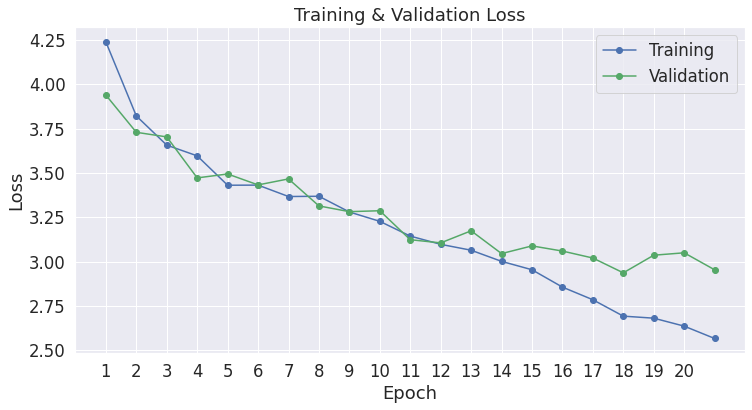

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os


output_dir = 'IR_project_khan_acad_model_hyperbolic_hinge_5/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to IR_project_khan_acad_model_hyperbolic_hinge_5/


('IR_project_khan_acad_model_hyperbolic_hinge_5/vocab.txt',
 'IR_project_khan_acad_model_hyperbolic_hinge_5/special_tokens_map.json',
 'IR_project_khan_acad_model_hyperbolic_hinge_5/added_tokens.json')

In [ ]:
# !pip install joblib
# import joblib
# joblib.dump(LE, "label_encoder")


In [ ]:
import json
torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))


In [ ]:
# with open(os.path.join(output_dir, 'model_config.json'), 'w') as f:
#     json.dump(model.config, f)

In [ ]:
!zip -r IR_project_khan_acad_model_hyperbolic_hinge_5.zip IR_project_khan_acad_model_hyperbolic_hinge_5/
# files.download('IR_project_khan_acad_model_hyperbolic_hinge_5.zip')

updating: IR_project_khan_acad_model_hyperbolic_hinge_5/ (stored 0%)
updating: IR_project_khan_acad_model_hyperbolic_hinge_5/tokenizer_config.json (stored 0%)
updating: IR_project_khan_acad_model_hyperbolic_hinge_5/special_tokens_map.json (deflated 40%)
updating: IR_project_khan_acad_model_hyperbolic_hinge_5/model_weights (deflated 7%)
updating: IR_project_khan_acad_model_hyperbolic_hinge_5/vocab.txt (deflated 53%)


In [ ]:
!cp IR_project_khan_acad_model_hyperbolic_hinge_5.zip "/content/drive/My Drive/Information_retrieval_project/khan_acad/"

In [ ]:
# !zip -r label_encoder_categorized_reduced.zip label_encoder
# files.download('label_encoder_categorized_reduced.zip')

In [ ]:
test_features = test_features.values
labels = test_labels.values

In [ ]:
test_features

array([' -  What I hope to do in this video is get familiar with the notion of an interval, and also think about ways that we can show an interval, or interval notation. Right over here I have a number line. Let\'s say I wanted to talk about the interval on the number line that goes from negative three to two. So I care about this-- Let me use a different color. Let\'s say I care about this interval right over here. I care about all the numbers from negative three to two. So in order to be more precise, I have to be clear. Am I including negative three and two, or am I not including negative three and two, or maybe I\'m just including one of them. So if I\'m including negative three and two, then I would fill them in. So this right over here, I\'m filling negative three and two in, which means that negative three and two are part of this interval. And when you include the endpoints, this is called a closed interval. Closed interval. And I just showed you how I can depict it on a number

In [ ]:
labels

array(['math>>math1>>x89d82521517266d4:functions',
       'math>>old-ap-calculus-ab>>ab-applications-definite-integrals',
       'economics-finance-domain>>ap-macroeconomics>>economic-iondicators-and-the-business-cycle',
       ...,
       'science>>in-in-class11th-physics>>in-in-system-of-particles-and-rotational-motion',
       'math>>precalculus>>x9e81a4f98389efdf:prob-comb',
       'science>>biology>>dna-as-the-genetic-material'], dtype=object)

In [ ]:
len(list(set(labels)))

416

In [ ]:

# course_taxonomy
test_labels = list(set(labels))
poincare_emb_data = get_poincare_embeddings_data(test_labels)

In [ ]:
poincare_emb_data

[['math', 'integral-calculus', 'ic-adv-funcs'],
 ['math', 'math3', 'x5549cc1686316ba5:poly-div'],
 ['economics-finance-domain',
  'ap-macroeconomics',
  'economic-iondicators-and-the-business-cycle'],
 ['math', 'cc-fourth-grade-math', 'imp-measurement-and-data-2'],
 ['math',
  'in-in-class-6-math-india-icse',
  'in-in-6-ratio-and-proportion-icse'],
 ['math', 'old-integral-calculus', 'integration-techniques'],
 ['economics-finance-domain', 'macroeconomics', 'forex-trade-topic'],
 ['math', 'engageny-alg-1', 'alg1-3'],
 ['math',
  'in-in-class-2nd-math-cbse',
  'x41ed04e12bec59cd:cc-2nd-add-subtract-1000'],
 ['science', 'organic-chemistry', 'alkenes-alkynes'],
 ['math', 'math-for-fun-and-glory', 'aime'],
 ['math', 'arithmetic', 'arith-review-multiply-divide'],
 ['math', 'cc-eighth-grade-math', 'geometric-transformations'],
 ['math', 'math1', 'x89d82521517266d4:systems'],
 ['science',
  'in-in-class11th-physics',
  'in-in-system-of-particles-and-rotational-motion'],
 ['math', 'ap-calculus-

In [ ]:
poincare_embedding =  [exponential_map(np.expand_dims( np.hstack(  [ poincare_model.kv.get_vector(str(x)) for x in taxonomy ] ),axis=0)) for taxonomy in poincare_emb_data ]
np.linalg.norm(poincare_embedding[311])

0.8989007520441563

In [ ]:
max_val = 0
max_emb =None
for embedding in poincare_embedding:
  val = embedding.shape[1]
  if val >max_val:
    max_val=val
    max_emb =embedding
max_val


60

In [ ]:
concatenated_embedding = []
for embedding in poincare_embedding:
  if embedding.shape[1] < max_val_train:
    new_embedding = np.append(embedding, np.expand_dims(np.zeros(max_val_train-embedding.shape[1]),axis=0),axis=1)
  else:
    new_embedding = embedding
  concatenated_embedding.append(np.squeeze(new_embedding,axis=0))



In [ ]:
poincare_embeddings_final = np.stack(concatenated_embedding, axis=0)
poincare_embeddings_final.shape

(416, 60)

In [ ]:
# model2 = MulticlassClassifier('bert-base-uncased')
# model2.load_state_dict(torch.load('model_hyperbolic_round_2/model_weights'))
# model2.cuda()

In [ ]:
test_input_ids = []
test_attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
# labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  
test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)

# Create the DataLoader.
# prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_poincare_tensor)
# prediction_sampler = SequentialSampler(prediction_data)
# prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)


In [ ]:
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
def dist_without_grad( u, v):
  sqdist = torch.sum((u - v) ** 2, dim=-1)
  squnorm = torch.sum(u ** 2, dim=-1)
  sqvnorm = torch.sum(v ** 2, dim=-1)
  x = 1 + 2 * sqdist / ((1 - squnorm) * (1 - sqvnorm)) + 1e-7
  z = torch.sqrt(x ** 2 - 1)
  return torch.log(x + z)

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
torch.topk(dist_without_grad(model2(test_input_ids[0].to('cuda').reshape(1,-1),test_attention_masks[0].to('cuda').reshape(1,-1)),test_poincare_tensor),3,largest=False)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.return_types.topk(values=tensor([3.1841, 3.1841, 3.1841], device='cuda:0', grad_fn=<TopkBackward>), indices=tensor([839, 682,  15], device='cuda:0'))

In [ ]:
def precision(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(k)
    return result

def recall(actual, predicted, k):
    act_set = set(actual)
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(len(act_set))
    return result

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

# Put model in evaluation mode
model.eval()
input_ids = test_input_ids.to('cuda')
attention_masks = test_attention_masks.to('cuda')
test_poincare_tensor = test_poincare_tensor.to('cuda')
# Tracking variables 
predictions , true_labels = [], []
for input_id,attention_mask in zip(input_ids, attention_masks):
  with torch.no_grad():
    outputs = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1))
  distances,indices = torch.topk(dist_without_grad(outputs,test_poincare_tensor),5,largest=False)
  predictions.append(test_labels[indices.cpu().numpy()])
print(len(predictions))
  # max_distance =100000000000000
  # label=None
  # for index,test_poincare in enumerate(test_poincare_tensor):

  #   distance = distanceTo(test_poincare, outputs)
  #   if distance < max_distance:
  #     max_distance = distance
  #     label = index
  # predictions.append(labels[label])
    
# Predict 
# for batch in prediction_dataloader:
#   # Add batch to GPU
#   batch = tuple(t.to(device) for t in batch)
  
#   # Unpack the inputs from our dataloader
#   b_input_ids, b_input_mask, b_labels = batch
  
#   # Telling the model not to compute or store gradients, saving memory and 
#   # speeding up prediction
#   with torch.no_grad():
#       # Forward pass, calculate logit predictions
#       outputs = model(b_input_ids,b_input_mask)

#   logits = outputs
#   for logit in logits:
#     max_similarity = 0


#   # Move logits and labels to CPU
#   logits = logits.detach().cpu().numpy()
#   label_ids = b_labels.to('cpu').numpy()
  
#   # Store predictions and true labels
#   predictions.append(logits)
#   true_labels.append(label_ids)

print('    DONE.')
# predictions

Predicting labels for 1,047 test sentences...


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


1047
    DONE.


In [ ]:
!pip install tensorflow==1.13.1

In [ ]:
labels=test_data['hierarchy'].values

In [ ]:
for index,label in enumerate(labels):
  if label not in list(train_data["hierarchy"].values):
    print(index,label)


61 math>>ap-statistics>>density-curves-normal-distribution-ap
314 math>>ap-statistics>>density-curves-normal-distribution-ap
385 math>>arithmetic>>fraction-arithmetic
436 math>>old-integral-calculus>>convergence-tests-integral-calc
444 math>>ap-statistics>>density-curves-normal-distribution-ap
879 math>>old-integral-calculus>>convergence-tests-integral-calc
926 math>>arithmetic>>fraction-arithmetic


In [ ]:
from sklearn .preprocessing import LabelEncoder
LE= LabelEncoder()
labels = LE.fit_transform(labels)
labels

array([238, 254,   2, ..., 386, 283, 324])

In [ ]:
labels

array([238, 254,   2, ..., 386, 283, 324])

In [ ]:
np.where(labels==325)

(array([ 787, 1034]),)

In [ ]:
final_predictions = []
for prediction in predictions:
  final_predictions.append(LE.transform(prediction))


In [ ]:
y_true

<tf.Tensor 'Identity_6:0' shape=(1400,) dtype=int64>

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=20)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=20)

tmp_rank = tf.nn.top_k(y_pred, 20)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))


    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1047, 20) (1047,)
update_recall:  0.562559694364852
recall 0.562559694364852
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 589.0, 458.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[243, 242, 241, ..., 177, 176,  29],
       [226, 225, 224, ...,  89,  88,  87],
       [ 20,  19,  18, ...,   2,   1,   0],
       ...,
       [279, 278, 277, ...,  91,  28,  26],
       [284, 283, 282, ...,  79,  78,  77],
       [334, 332, 331, ..., 301, 300, 299]]), indices=array([[ 5,  6,  4, ...,  7,  9,  3],
       [ 2,  0,  1, ...,  9,  7, 10],
       [ 8, 13, 14, ...,  9,  7, 12],
       ...,
       [16, 15, 17, ..., 10, 18, 19],
       [ 4,  3,  2, ..., 10, 12, 13],
       [12, 13, 14, ...,  3,  0,  2]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 15)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 15)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1047, 15) (1047,)
update_recall:  0.5243553008595988
recall 0.5243553008595988
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 549.0, 498.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[243, 242, 241, ..., 177, 176,  29],
       [226, 225, 224, ...,  89,  88,  87],
       [ 20,  19,  18, ...,   2,   1,   0],
       ...,
       [276, 182, 181, ...,  93,  92,  91],
       [284, 283, 282, ...,  79,  78,  77],
       [334, 332, 331, ..., 301, 300, 299]]), indices=array([[ 5,  6,  4, ...,  7,  9,  3],
       [ 2,  0,  1, ...,  9,  7, 10],
       [ 8, 13, 14, ...,  9,  7, 12],
       ...,
       [14,  2,  5, ...,  9, 13, 10],
       [ 4,  3,  2, ..., 10, 12, 13],
       [12, 13, 14, ...,  3,  0,  2]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 10)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 10)

tmp_rank = tf.nn.top_k(y_pred, 10)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1047, 10) (1047,)
update_recall:  0.44508118433619864
recall 0.44508118433619864
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 466.0, 581.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[243, 242, 241, ..., 177, 176,  29],
       [226, 225, 224, ...,  90,  89,  88],
       [ 20,  16,  15, ...,  10,   2,   1],
       ...,
       [182, 181, 180, ...,  95,  94,  93],
       [284, 283, 282, ...,  82,  81,  80],
       [326, 323, 321, ..., 301, 300, 299]]), indices=array([[5, 6, 4, ..., 7, 9, 3],
       [2, 0, 1, ..., 8, 9, 7],
       [8, 6, 4, ..., 1, 9, 7],
       ...,
       [2, 5, 4, ..., 8, 7, 9],
       [4, 3, 2, ..., 6, 5, 8],
       [8, 7, 9, ..., 3, 0, 2]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 5)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 5)

tmp_rank = tf.nn.top_k(y_pred, 5)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(1047, 5) (1047,)
update_recall:  0.3037249283667622
recall 0.3037249283667622
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 318.0, 729.0, 0.0, 0.0]
TMP_RANK:  TopKV2(values=array([[241, 191, 190, 189,  29],
       [226, 225, 224, 133, 132],
       [ 15,  14,  13,  11,  10],
       ...,
       [182, 180, 179, 178, 177],
       [284, 283, 282, 281, 280],
       [305, 302, 301, 300, 299]]), indices=array([[4, 1, 2, 0, 3],
       [2, 0, 1, 4, 3],
       [4, 3, 2, 0, 1],
       ...,
       [2, 4, 0, 1, 3],
       [4, 3, 2, 1, 0],
       [1, 4, 3, 0, 2]], dtype=int32))
